In [270]:
import pandas as pd

df = pd.read_csv('new 4.csv')

In [271]:
df.head()

,label,Iemg,var,Mav,Zerocrossing,Signalslopechange,Iemg.1,var.1,Mav.1,Zerocrossing.1,Signalslopechange.1
0,lat,0.738729,0.018598,0.147805,346,830,0.739068,0.267811,0.147976,1062,795
1,lat,0.734572,0.063366,0.146979,448,825,0.772712,0.337996,0.154720,1106,818
2,lat,0.741263,0.017533,0.148297,341,818,0.736951,0.447716,0.147466,1223,814
3,lat,0.747833,0.028231,0.149570,397,771,0.752744,0.346960,0.150426,1174,820
4,lat,0.749848,0.016811,0.149998,344,802,0.749610,0.348022,0.149600,1137,812


In [272]:
df.shape

(1800, 11)

In [273]:
df.label.value_counts()

Cyl      300
lat      300
hook     300
tip      300
palm     300
spher    300
Name: label, dtype: int64

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1),df.label,test_size = 0.3
                                                   ,stratify = df.label)

In [275]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [276]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [277]:
rmse_val = [] #to store rmse values for different k
KVal = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, pd.get_dummies(y_train))  #fit the model
    pred= model.predict(X_test) #make prediction on test set
    error = accuracy_score(pd.get_dummies(y_test).values.argmax(axis=1),pred.argmax(axis=1)) #calculate rmse
    rmse_val.append(error) #store rmse values
    KVal.append(K)
    print('Accuracy for k= ' , K , 'is:', error)

Accuracy for k=  1 is: 0.7203703703703703
Accuracy for k=  2 is: 0.7407407407407407
Accuracy for k=  3 is: 0.7462962962962963
Accuracy for k=  4 is: 0.7814814814814814
Accuracy for k=  5 is: 0.7796296296296297
Accuracy for k=  6 is: 0.7870370370370371
Accuracy for k=  7 is: 0.7777777777777778
Accuracy for k=  8 is: 0.7777777777777778
Accuracy for k=  9 is: 0.774074074074074
Accuracy for k=  10 is: 0.7777777777777778
Accuracy for k=  11 is: 0.7703703703703704
Accuracy for k=  12 is: 0.7666666666666667
Accuracy for k=  13 is: 0.7722222222222223
Accuracy for k=  14 is: 0.774074074074074
Accuracy for k=  15 is: 0.7648148148148148
Accuracy for k=  16 is: 0.7685185185185185
Accuracy for k=  17 is: 0.7611111111111111
Accuracy for k=  18 is: 0.7648148148148148
Accuracy for k=  19 is: 0.7592592592592593
Accuracy for k=  20 is: 0.7574074074074074


In [278]:
#plotting the rmse values against k values
curve = pd.DataFrame({'K':KVal,'Accuracy':rmse_val}) #elbow curve 


In [279]:
curve.set_index(curve.K,drop=True,inplace=True)

curve.drop('K',inplace=True,axis=1)

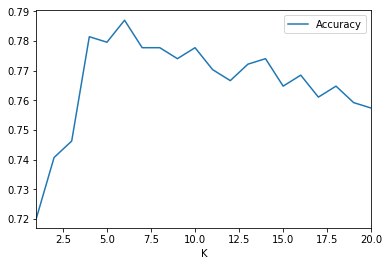

In [280]:
curve.plot.line()

In [281]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


0.3611111111111111
0.32407407407407407
0.30925925925925923
0.32407407407407407
0.30185185185185187
0.2851851851851852
0.28703703703703703
0.2833333333333333
0.26666666666666666
0.26851851851851855
0.2796296296296296
0.28703703703703703
0.29074074074074074
0.2796296296296296
0.29259259259259257
0.30185185185185187
0.2962962962962963
0.29444444444444445


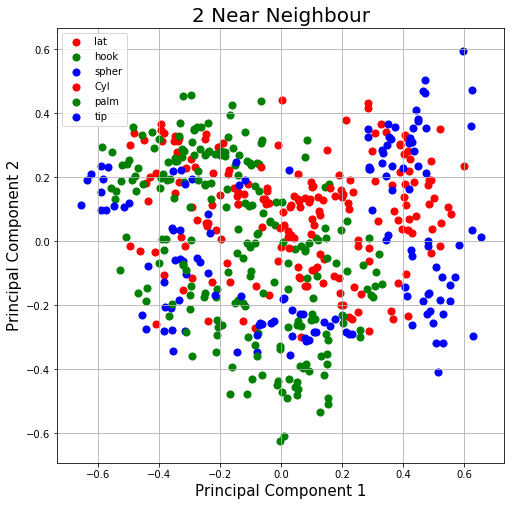

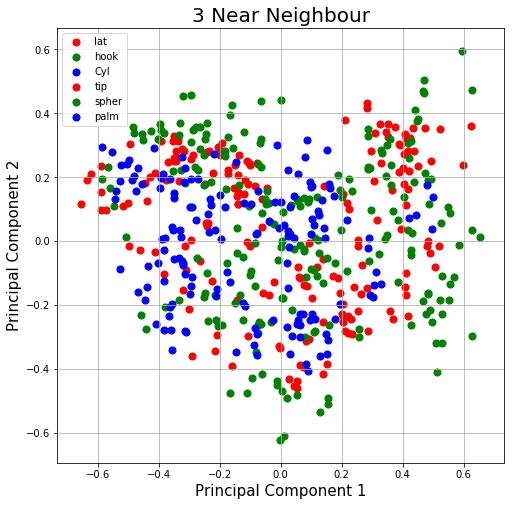

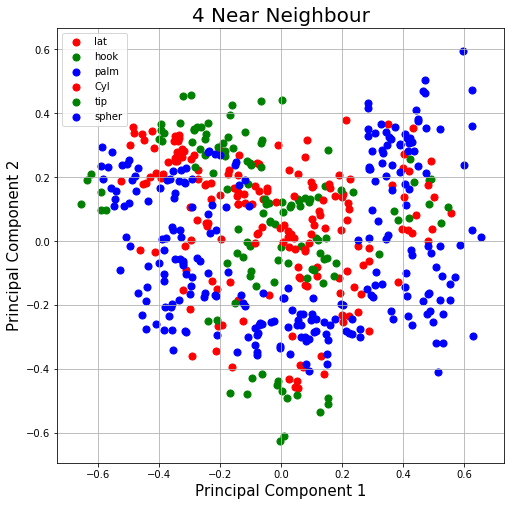

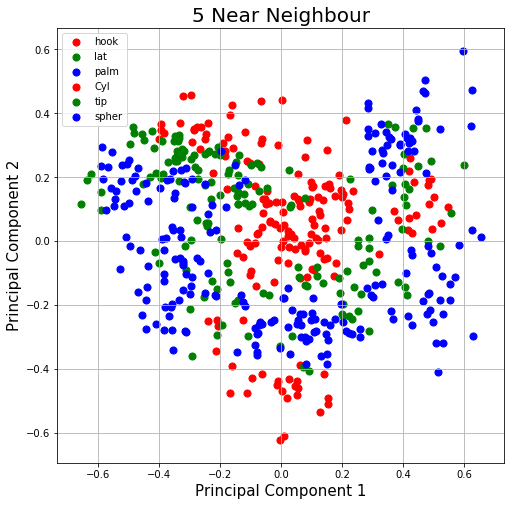

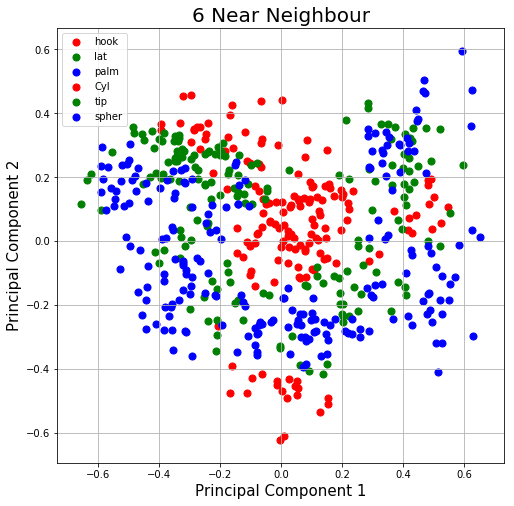

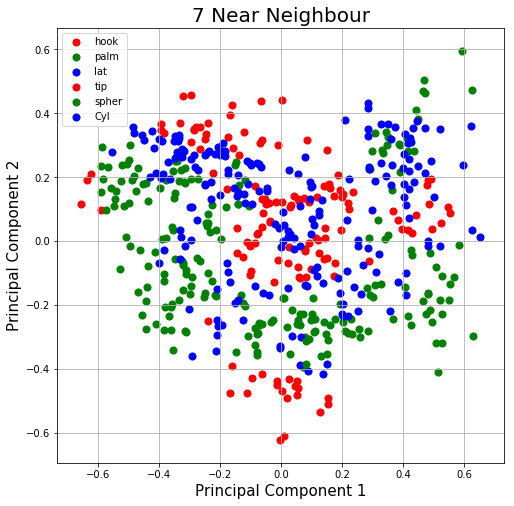

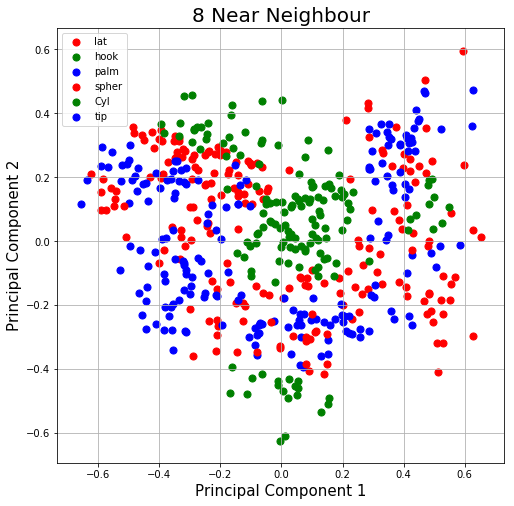

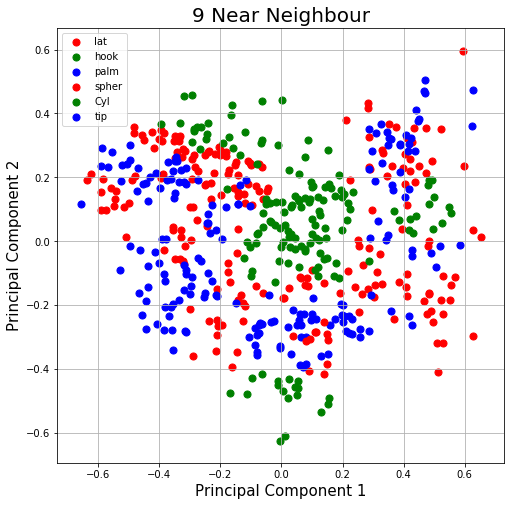

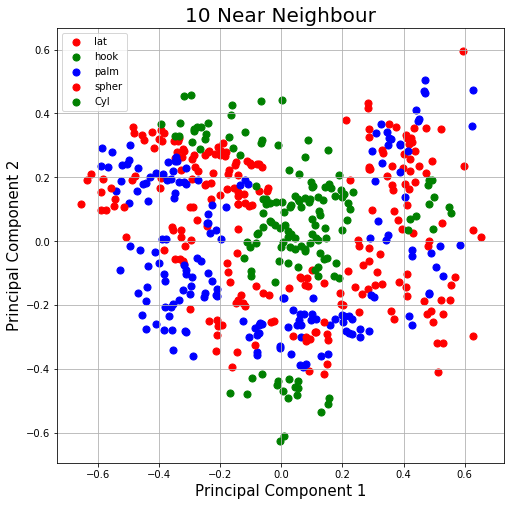

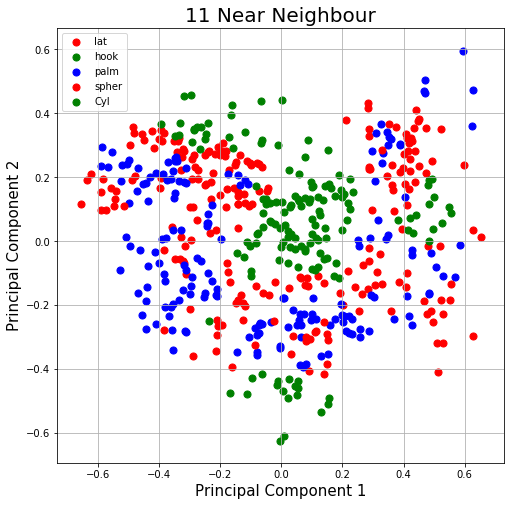

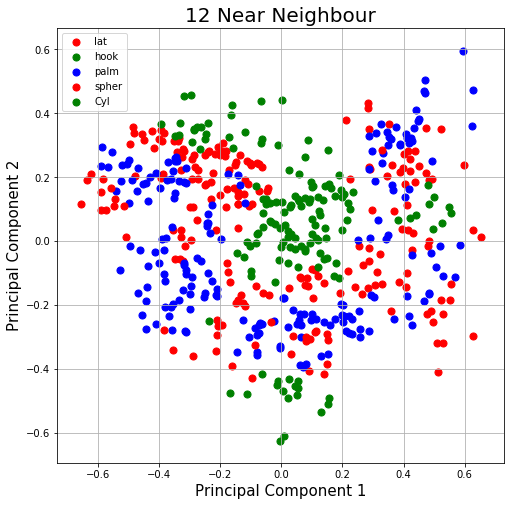

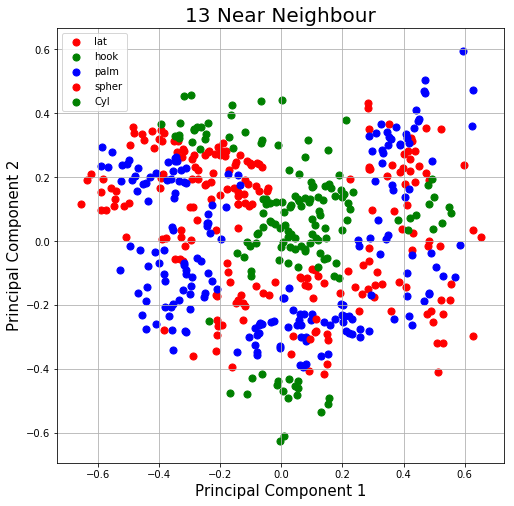

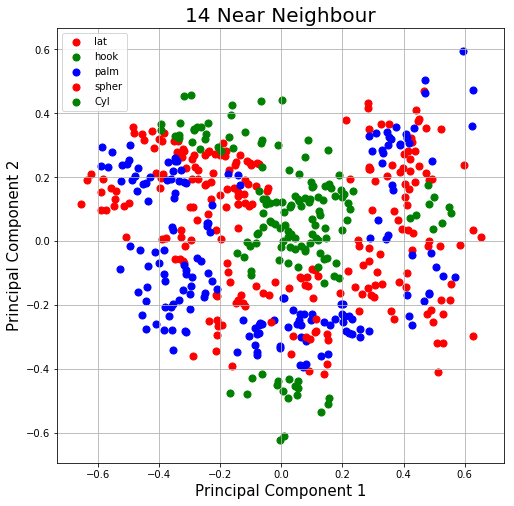

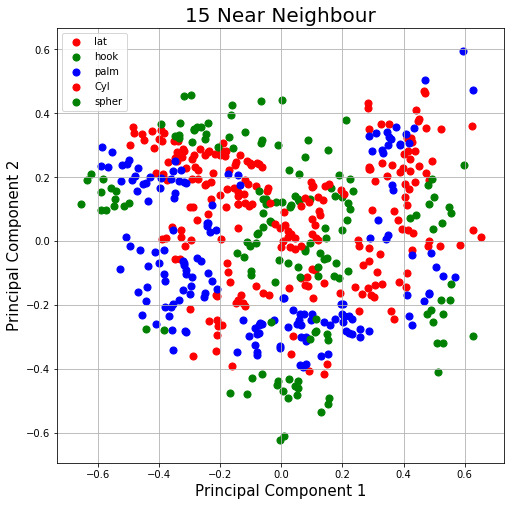

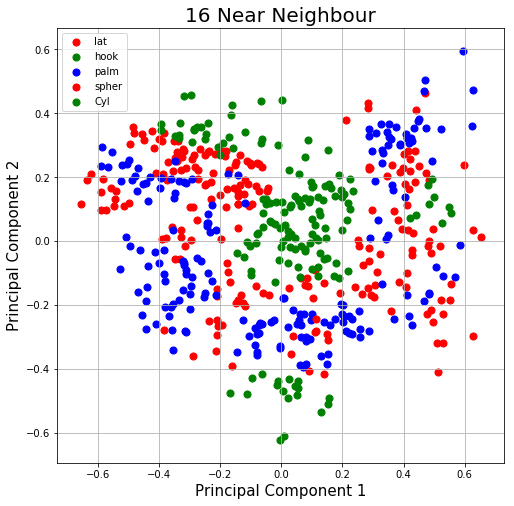

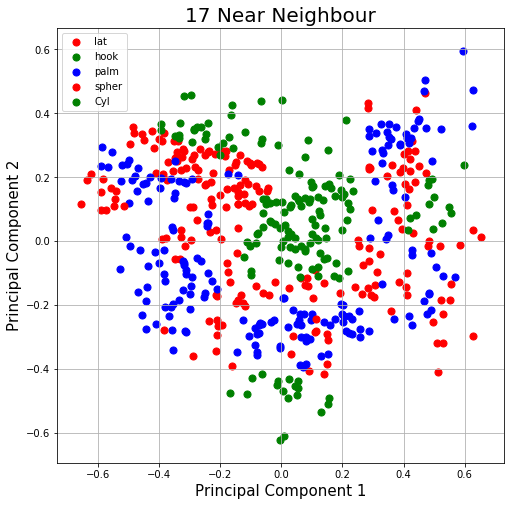

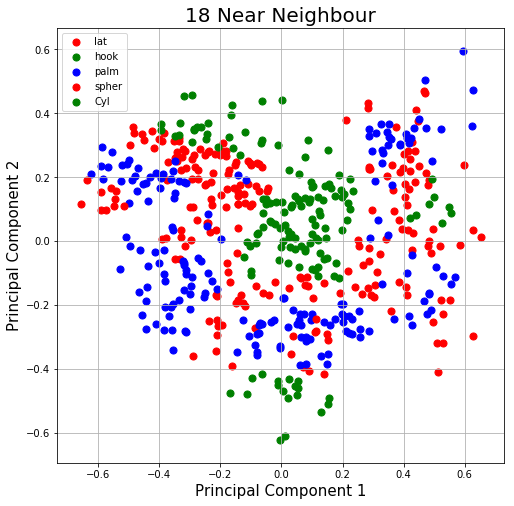

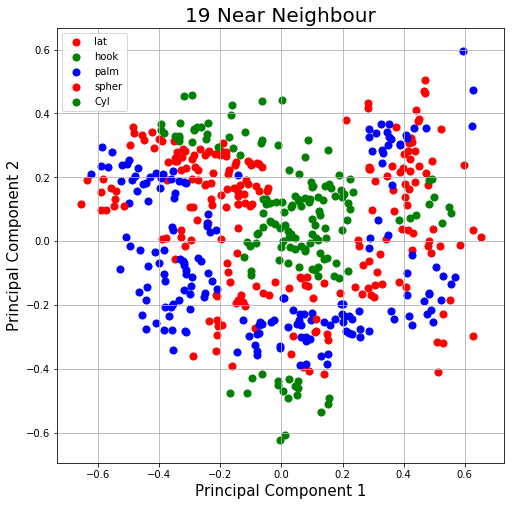

In [282]:
from sklearn.decomposition import PCA

for N in range(2,20):
    pca = PCA(n_components=2)

    X_transformed = pca.fit_transform(X_train)
    X_transformed = pd.DataFrame(X_transformed,columns=['PCA-1','PCA-2'])
    X_transformed['target'] = le.fit_transform(y_train.astype('str'))

    model = neighbors.KNeighborsRegressor(n_neighbors = N)
    model.fit(X_transformed.drop('target',axis=1),X_transformed['target'])


    X_test_transformed = pca.transform(X_test)
    X_test_transformed = pd.DataFrame(X_test_transformed,columns=['PCA-1','PCA-2'])
    X_test_transformed['target'] = model.predict(X_test_transformed).astype('int')

    print(accuracy_score(le.transform(y_test),X_test_transformed['target']))

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title(str(N) +' Near Neighbour', fontsize = 20)
    targets = X_test_transformed.target.unique()
    targets = le.inverse_transform(targets)
    colors = ['r', 'g', 'b','r','g','b']
    for target, color in zip(targets,colors):
        indicesToKeep = le.inverse_transform(X_test_transformed['target']) == target
        ax.scatter(X_test_transformed.loc[indicesToKeep, 'PCA-1']
                   , X_test_transformed.loc[indicesToKeep, 'PCA-2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    del X_transformed
    del X_test_transformed